In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
logging.getLogger("cmdstanpy").disabled = True


## Introduction

This challenge consists in identifying trends and insights in a sales dataset and forecasting weekly sales based on a time series.

Those were the requirements:

1. Predict the sales of each department in each store for the next year.
2. Propose recommended actions based on the insights obtained, prioritizing those with the greatest business impact.
3. Model the effects of discounts during holiday weeks.
4. Create an API that allows the store system to query, through an endpoint, the sales forecast for the next four weeks.

The solution was implemented with two different models, which will be explained in the following topics, one for the next year prediction and one for the four weeks API:

**Prophet** - next year prediction

**Regressor (XGBoost)** - four weeks prediction


## Data
The dataset consists of 3 csv files containing stores/departments weekly sales from 05/02/2010 to 01/11/2012.

The first step was joining this data to gather all the relevant information and saving it into a new dataset (combined_data.csv)

The code for joining the data can be found in the notebook data_processing.ipynb

In [2]:
df = pd.read_csv('../data/combined_data.csv')


In [3]:
df.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week,month,day
0,2010-02-05,1,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,5
1,2010-02-05,29,5,15552.08,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,5,2,5
2,2010-02-05,29,6,3200.22,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,5,2,5
3,2010-02-05,29,7,10820.05,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,5,2,5
4,2010-02-05,29,8,20055.64,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,5,2,5


## 1. Predict the sales of each department in each store for the following year.

### Model
To predict the next year sales it was chosen Facebook's forecasting model [Prophet](https://facebook.github.io/prophet/)

The solution using this model can be found on src/app/prophet_handler.py

In [4]:
import sys
from pathlib import Path
src_path = Path.cwd().parent / "src"
sys.path.append(str(src_path))
from app.prophet_handler import ProphetModel

/Users/joaoandrade/.pyenv/versions/3.12.7/envs/chatbot/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
#Predict returns a dataframe with weekly_sales_prediction for each week of the following year
prophet = ProphetModel()
predictions=prophet.predict(store=1,department=5)
predictions.head(10)

Optimization terminated abnormally. Falling back to Newton.


,date,weekly_sales_prediction,store,department
143,2012-10-28,26212.061820,1,5
144,2012-11-04,27804.447645,1,5
145,2012-11-11,32591.394438,1,5
146,2012-11-18,27305.212604,1,5
147,2012-11-25,29792.175701,1,5
148,2012-12-02,37610.579179,1,5
149,2012-12-09,48559.807428,1,5
150,2012-12-16,56216.514897,1,5
151,2012-12-23,54585.995549,1,5
152,2012-12-30,43257.136416,1,5


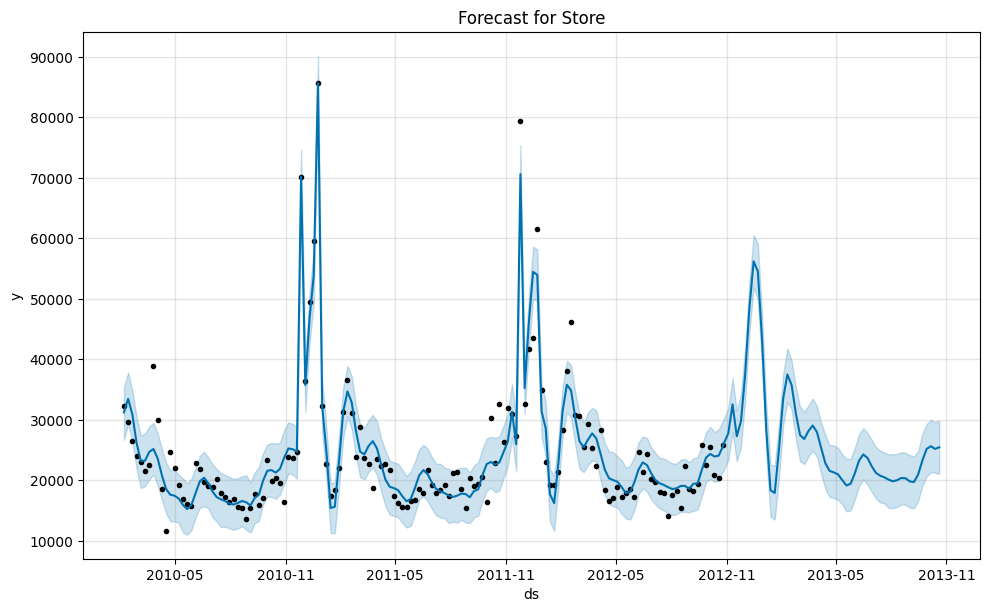

In [6]:
#Plot predictions plot the true values (black dots), and the prediction (blue line)
#y= weekly_sales
#ds = date
prophet.plot_prediction()

Optimization terminated abnormally. Falling back to Newton.


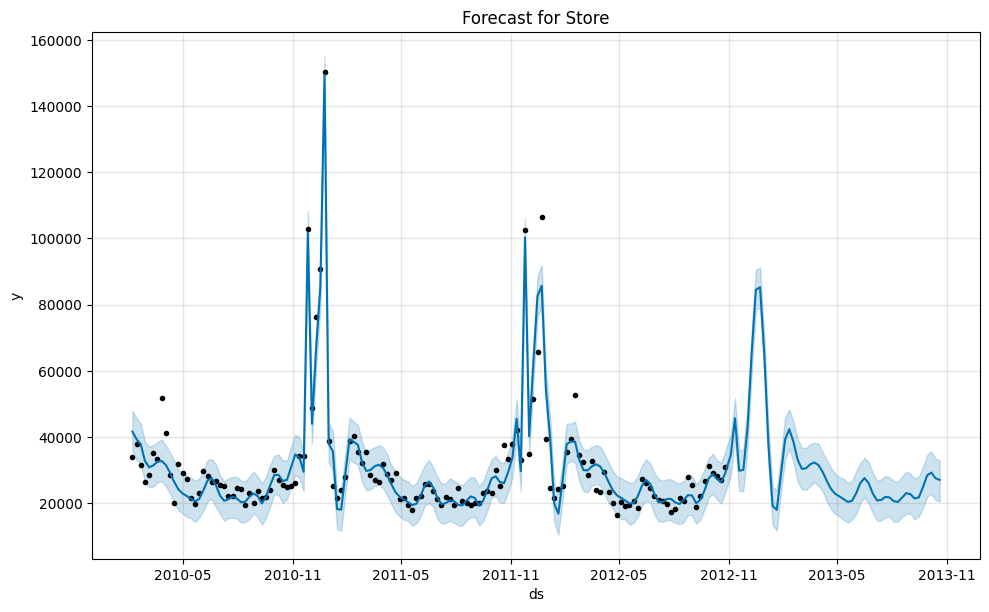

In [7]:
predictions_2=prophet.predict(store=2,department=5)
prophet.plot_prediction()

## 2. Propose recommended actions based on the insights obtained, prioritizing those with the greatest business impact.
